# <font color = violet>Bike Sharing Assignment</font>

### 1. Data Reading

#### 1.1 Importing libraries

In [1]:
# Supressing the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all relevant libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import sklearn as skl

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Making sure that we see all rows and columns, since in newer editions python does not show all data by default

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Resetting the seaborn style 

sns.reset_orig()

#### 1.2 Reading the data and checking its metrics 

In [5]:
# Loading and reading the top 5 rows of dataset

bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking the shape of dataset

bike_df.shape

(730, 16)

In [7]:
# Checking the columns of dataset

bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# Checking the columns-wise summary of dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


As we can see from above that `no null values` are present and `right data type` is associated with all columns.

In [9]:
# Checking the statical summary of all numeric columns
         
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


From the summary above it can be noted that all the values are within `acceptable region` and thus `passes the sanity check`

### 2. Data Cleaning & Pre-Processing

#### 2.1 Removing insignificant columns (`From buisness prespective`)

Once having a good look at the data dictionary we can conclude that columns `instant` and `dteday` are `insignificant from business perspective` while columns `casual` and `registered` are redundant since they offer nothing different from our target variable and hence they all should be dropped.

In [10]:
# Dropping above columns

bike_df.drop(['instant','dteday','casual','registered'] , axis = 1, inplace = True)

In [11]:
# Checking the modified dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### 2.2 Removing encoding from columns & Transforming them into correct dtype

We can see that columns `mnth`, `season`, `weathersit` and `weekday` are having dtype as `int64` and treated as continuous variables while in reality, they are categorical and therefore they must be treated as such.

In [12]:
# Looking at the count of all values in mnth column

bike_df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

Here the months are encoded as in the order they exist, i.e January as 1 while December as 12 and others follow the same pattern, hence we need to substitute these numeric encodings with their respective labels. 

In [13]:
# defining our custom function to decode

def m_decoder(m):
    return m.map({ 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',  5:'May',  6:'Jun', 
                   7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec' })

In [14]:
# Applying the custom function

bike_df[['mnth']] = bike_df[['mnth']].apply(m_decoder)

In [15]:
# Changing the dtype to category

bike_df[['mnth']] = bike_df[['mnth']].astype('category')

In [16]:
# Looking at the count of all values in mnth column after transformation

bike_df.mnth.value_counts()

Oct    62
May    62
Mar    62
Jul    62
Jan    62
Dec    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [17]:
# Confirming dtype to be category

bike_df['mnth'].dtype

CategoricalDtype(categories=['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
                  'May', 'Nov', 'Oct', 'Sep'],
                 ordered=False)

As we can see the column has been succesfully transformed, Now we will achieve the same for other columns

In [18]:
bike_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

Here the seasons are encoded in the following way,

`1 : Spring`

`2 : Summer`

`3 : Fall`

`4 : Winter`

hence we need to substitute these numeric encodings with their respective labels. 

In [19]:
def s_decoder(s):
    return s.map({ 1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter' })

In [20]:
bike_df[['season']] = bike_df[['season']].apply(s_decoder)

In [21]:
bike_df[['season']] = bike_df[['season']].astype('category')

In [22]:
bike_df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [23]:
bike_df['season'].dtype

CategoricalDtype(categories=['Fall', 'Spring', 'Summer', 'Winter'], ordered=False)

As we can see the column has been succesfully transformed, Now we will achieve the same for other columns

In [24]:
bike_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

Here the weather are encoded in the following way,

`1 : Clear, Few clouds, Partly cloudy` AKA `Clear`

`2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist` AKA `Misty`

`3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds` AKA `Precipitating`


hence we need to substitute these numeric encodings with their respective labels. 

In [25]:
def w_decoder(w):
    return w.map({ 1:'Clear', 2:'Misty', 3:'Precipitating' })

In [26]:
bike_df[['weathersit']] = bike_df[['weathersit']].apply(w_decoder)

In [27]:
bike_df[['weathersit']] = bike_df[['weathersit']].astype('category')

In [28]:
bike_df.weathersit.value_counts()

Clear            463
Misty            246
Precipitating     21
Name: weathersit, dtype: int64

In [29]:
bike_df['weathersit'].dtype

CategoricalDtype(categories=['Clear', 'Misty', 'Precipitating'], ordered=False)

As we can see the column has been succesfully transformed, Now we will achieve the same for other columns

In [30]:
bike_df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

Here the weekdays are encoded as in the order they exist, i.e Monday as 1 while sunday as 0 and others follow the same pattern, hence we need to substitute these numeric encodings with their respective labels. 

In [31]:
def we_decoder(we):
    return we.map({ 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',  5:'Fri',  6:'Sat', 0:'Sun' })

In [32]:
bike_df[['weekday']] = bike_df[['weekday']].apply(we_decoder)

In [33]:
bike_df[['weekday']] = bike_df[['weekday']].astype('category')

In [34]:
bike_df.weekday.value_counts()

Tue    105
Mon    105
Wed    104
Thu    104
Sun    104
Sat    104
Fri    104
Name: weekday, dtype: int64

In [35]:
bike_df['weekday'].dtype

CategoricalDtype(categories=['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], ordered=False)

As we can see all the columns have been succesfully transformed.

### 3. Data Visualization

In [36]:
bike_df.columns   

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [37]:
bike_df_num = bike_df.iloc[:,7:]   # Storing all numerical columns seperately
bike_df_cat = bike_df.iloc[:,:7]   # Storing all categorical columns seperately

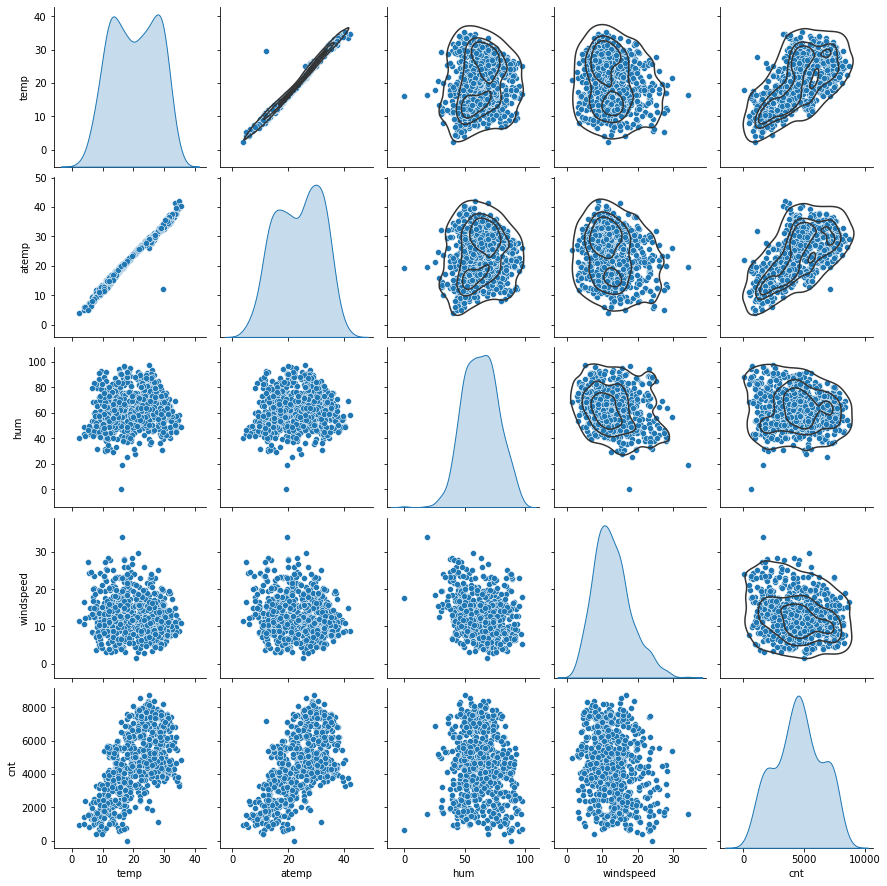

In [38]:
# Plotting pair-plots for all numeric columns with upper portion visually distributed as per observation (in black outline)


(sns.pairplot(bike_df_num, diag_kind = 'kde')).map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

From the above plot it can be noticed that -:
1.     `temp` and `atemp` as expected show high co-relation and we will deal with them later.


2.      As `temp` or `atemp` increases, our target variable also increases i.e there is a high colinearity between count of bikes and the tempreature, which makes sense as people tend to enjoy outdoor activities more when the temperature is high enough especially in the U.S where most of the zones have a temperate or cold semi-arid climate

In [39]:
# Looking at correlation between variables

bike_df_num.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


Let us use heatmaps to further understand the correlation between variables

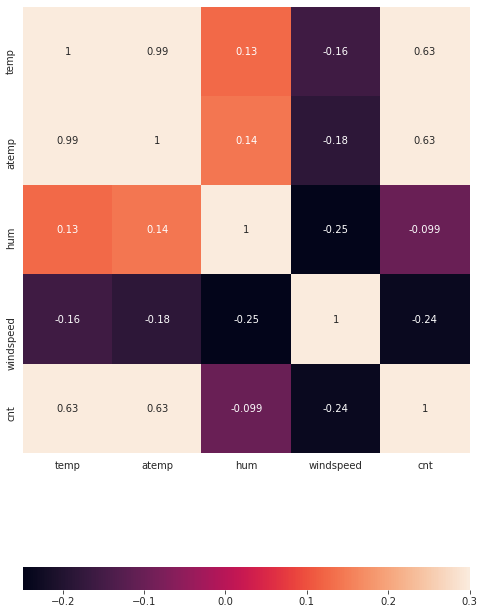

In [40]:
# Plotting Heatmap of correlation between variables 

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 14))
    ax = sns.heatmap(bike_df_num.corr(), annot = True, vmax=.3, square=True, cbar_kws={"orientation": "horizontal"})
plt.show()

Again it is evident from the correlation matrix and heatmaps that `atemp` and `temp` are very highly correlated to a point where they can more or less be considered a single entity, so from the business perspective it would be better to keep `atemp` as it is a better metric of the temperature felt by the people

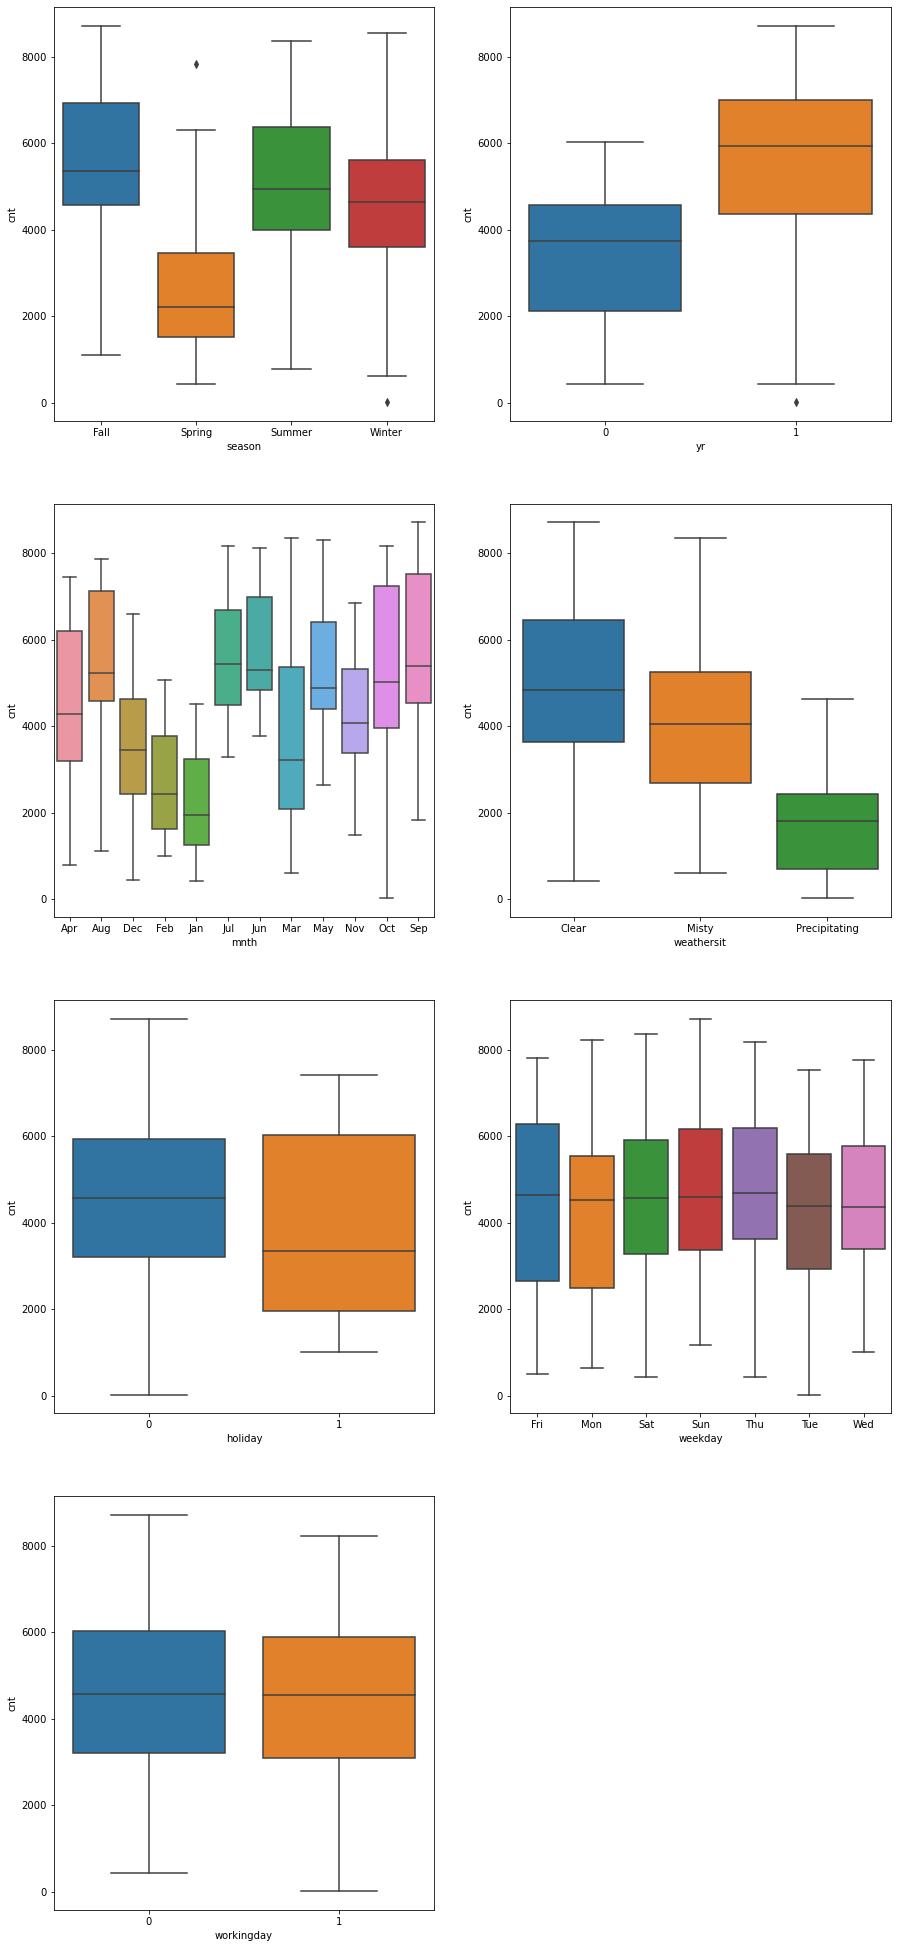

In [41]:
# Plotting Boxplots of categorical variables with respect to the target variable


plt.figure(figsize=(15, 35))

plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)

plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)

plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)

plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)

plt.subplot(4,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)

plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)

plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)

plt.show()

Here are some insights that can be gained from the boxplots --:
1. Fall and Summer have a very high demand for bikes with a median well over 5000 while in Spring the demand is least with a median just above 2000.
2. The demand for bikes in the early months is low, which then increases till mid-year and hits the peak somewhere in September, and then again it decreases, with January being the month with the least demand.
3. The median demand for bikes on holidays is lower (near to 3000) than that of non-holidays (near to 4500)
4. The demand does not depend much on whether it's a working day or not.
5. The demand has risen from 2018 to 2019, with the median increasing nearly 1.5 times.
6. When the weather is clear the demand is comparatively more than when the weather is misty or cloudy, while it gets plummeted if it's precipitating.
7. While the median of bike demand does not appear to be affected much by weekdays it can be noticed that the peak of demand is highest on Sundays.


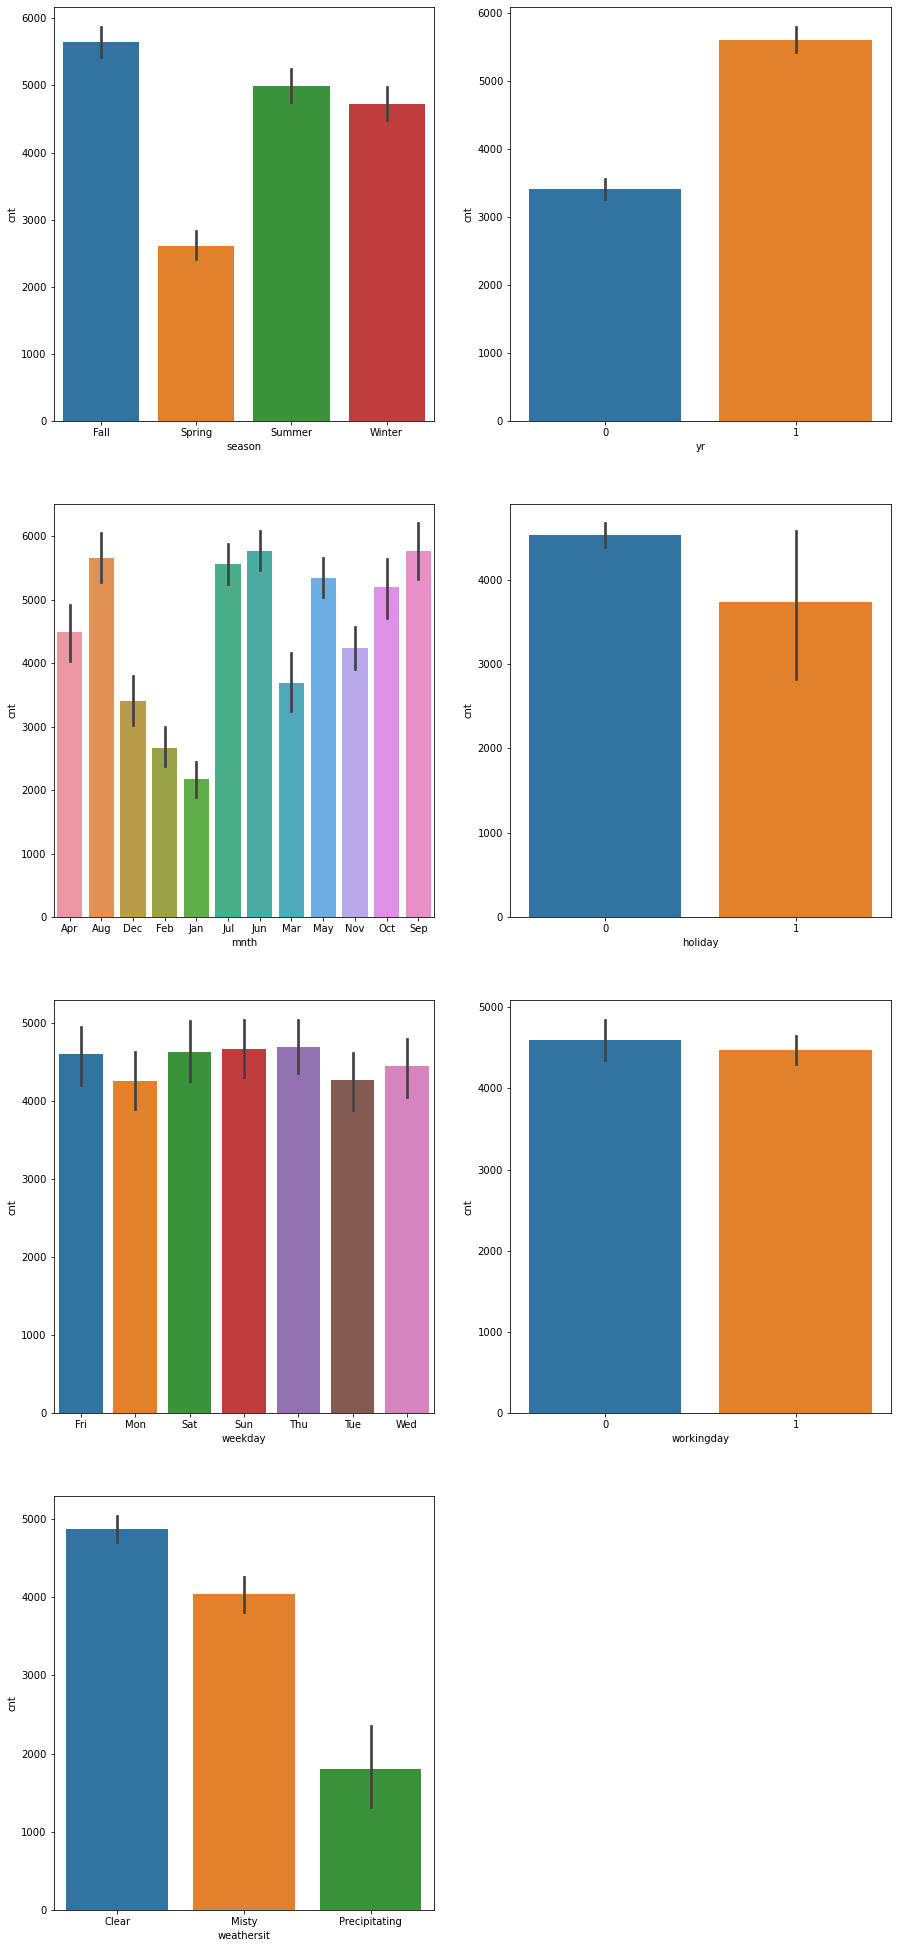

In [42]:
# Plotting Barplots of categorical variables with respect to the target variable

plt.figure(figsize=(15, 35))

plt.subplot(4,2,1)
sns.barplot(x = bike_df.season, y = bike_df.cnt )

plt.subplot(4,2,2)
sns.barplot(x = bike_df.yr, y = bike_df.cnt )

plt.subplot(4,2,3)
sns.barplot(x = bike_df.mnth, y = bike_df.cnt )

plt.subplot(4,2,4)
sns.barplot(x = bike_df.holiday, y = bike_df.cnt )

plt.subplot(4,2,5)
sns.barplot(x = bike_df.weekday, y = bike_df.cnt )

plt.subplot(4,2,6)
sns.barplot(x = bike_df.workingday, y = bike_df.cnt )

plt.subplot(4,2,7)
sns.barplot(x = bike_df.weathersit, y = bike_df.cnt )


plt.show()

Barplots Confirm all the infrences we drew from Boxplots


### 4.  Preparing the dataset post visualization

#### 4.1 Removing the highly correlated variables

In [43]:
# Dropping `temp` column as it is highly correlated with `atemp` column

bike_df.drop('temp', axis = 1, inplace = True)

#### Reason to Remove `temp` instead of `atemp`

Since both `temp` and `atemp` are highly correlated therefore we needed to drop one of those, the decision to drop `temp` took because the temperature does not depend on any other factors except months and seasons, while `atemp` or the temperature as felt depends on humidity, wind speed, U.V index and other factors like pollution.

So in a way, `atemp` plays a more vital role in the variation of demand of bikes even though the difference might be insignificant but taking `atemp` could prove to be a better metric. An example of this could be that in summer, we may feel hotter than usual if the humidity is high and wind speed is low, while in the winter, we may feel colder if both humidity and the wind speed are more.

In [44]:
# Checking the column wise info again

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   atemp       730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


#### 4.2 Creating dummy variables for categorical variables

In [45]:
# Creating dummy variables using pd.get_dummies

bike_df = pd.get_dummies(bike_df, drop_first = True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   atemp                     730 non-null    float64
 4   hum                       730 non-null    float64
 5   windspeed                 730 non-null    float64
 6   cnt                       730 non-null    int64  
 7   season_Spring             730 non-null    uint8  
 8   season_Summer             730 non-null    uint8  
 9   season_Winter             730 non-null    uint8  
 10  mnth_Aug                  730 non-null    uint8  
 11  mnth_Dec                  730 non-null    uint8  
 12  mnth_Feb                  730 non-null    uint8  
 13  mnth_Jan                  730 non-null    uint8  
 14  mnth_Jul  

In [46]:
bike_df.columns   # Having a look at all columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Misty', 'weathersit_Precipitating'],
      dtype='object')

In [47]:
bike_df.head()   # Having a look at top 5 columns

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Misty,weathersit_Precipitating
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As we can see dummy columns have been sucessfully created

### 5.  Training the data

#### 5.1 Splitting the dataset into X (independent) and y (dependent)

In [48]:
# Performing a train-test split on our dataset with 70% to 30% ratios respectively

df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
# Scaling the dataset to ensure comparable scale

scale = MinMaxScaler()

In [50]:
# checking the numerical summary before moving ahead

bike_df.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Misty,weathersit_Precipitating
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.336986,0.028767
std,0.500343,0.167266,0.462641,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.473004,0.167266
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# Scaling all variables except dummy and 'yes-no' (0 & 1 in this case) variables

non_dum = ['atemp','hum','windspeed','cnt']

df_train[non_dum] = scale.fit_transform(df_train[non_dum])            

In [52]:
df_train.describe() # Making sure that the dataset has been successfully scaled

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Misty,weathersit_Precipitating
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now our train dataset has been succesfully scaled  

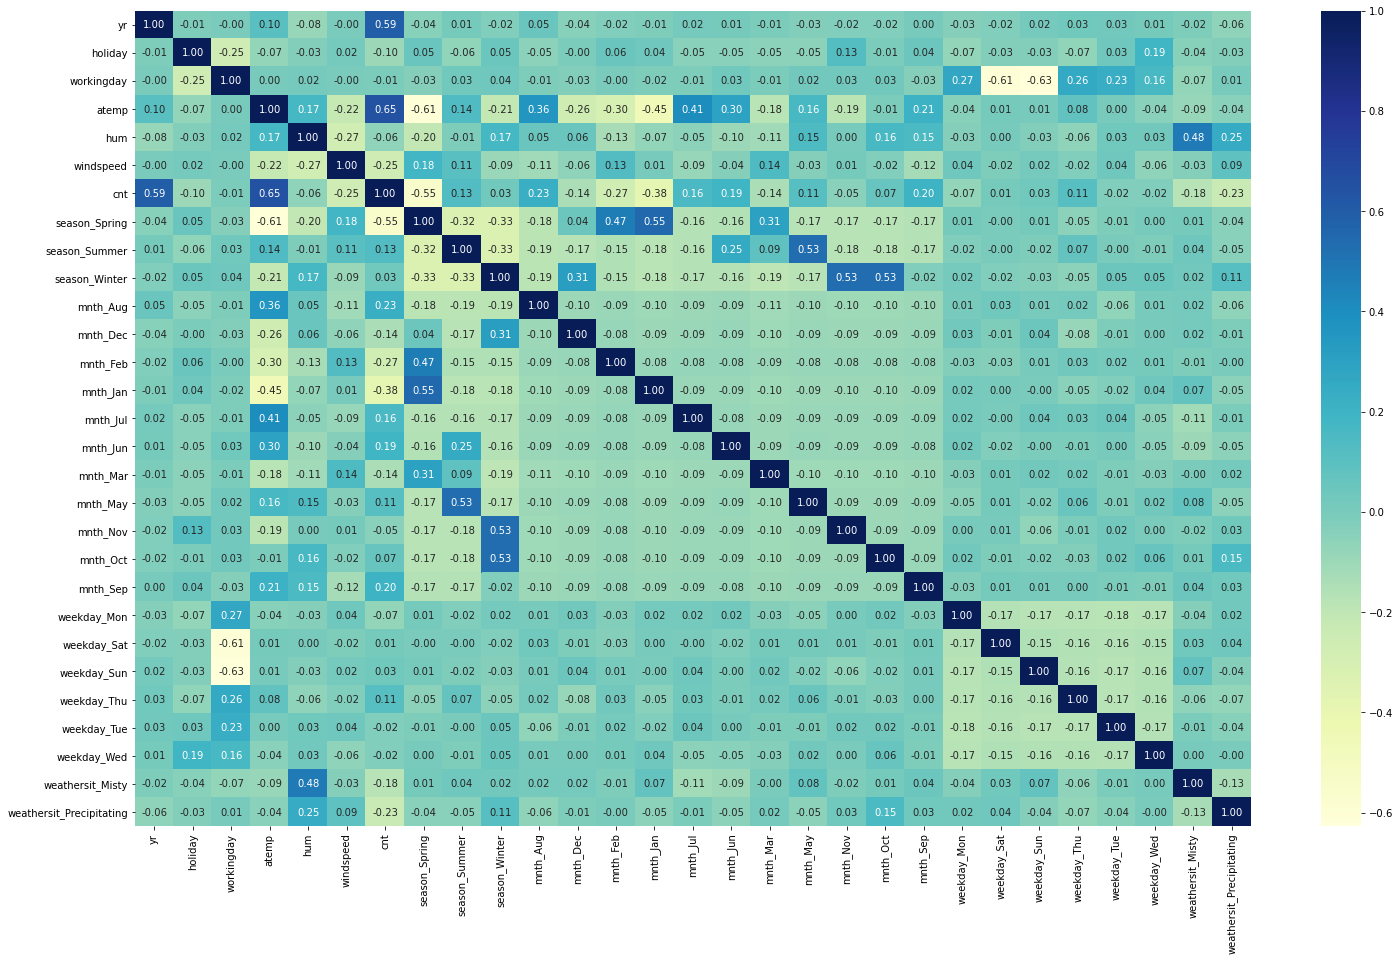

In [53]:
# Plotting a heatmap of correlations for our train dataset 

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", fmt = '.2f')
plt.show()

Here we can observe that many variables are highly correlated with each other and we shall deal with them accordingly during model selection

Also it can be noted that columns `yr` , `atemp`, `season_spring`(negatively) and `mnth_jan`(negatively) are highly correlated with our target variable

In [54]:
y_train = df_train.pop('cnt')
X_train = df_train

In [55]:
X_train.columns  # Having a look at all columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Misty', 'weathersit_Precipitating'],
      dtype='object')

In [56]:
y_train.head()  # Having a look at top 5 columns

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

#### 5.2 Building 1st Model

In [57]:
# Using the class LinearRegression we will build a function


lm = LinearRegression()
lm.fit(X_train, y_train)                          # applying function on our train and test datasets

rfe = RFE(lm, 20)                                 #  using RFE prioritizing 20 variables, to begin with             
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  # Creating list with column name and thier RFE ranking

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 5),
 ('mnth_Jun', False, 2),
 ('mnth_Mar', False, 9),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 8),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 6),
 ('weathersit_Misty', True, 1),
 ('weathersit_Precipitating', True, 1)]

In [59]:
tr_col = X_train.columns[rfe.support_]  # Exctracting top 20 columns upon which our model is to be built
tr_col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Misty',
       'weathersit_Precipitating'],
      dtype='object')

In [60]:
X_train_rfe = X_train[tr_col]    # Exctracting the dataset for those 20 columns

In [61]:
X_train_rfe = sm.add_constant(X_train_rfe)  # adding a constant else the intercept will through origin by default

In [62]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()     # training the model 

In [63]:
print(lm1.summary())  # checking statical summary of the model 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     133.5
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          1.69e-183
Time:                        22:52:37   Log-Likelihood:                 514.32
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     489   BIC:                            -897.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [64]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

`Calculating VIF`

In [65]:
vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
2,workingday,48.79
4,hum,38.94
3,atemp,26.51
17,weekday_Sun,9.75
16,weekday_Sat,9.33
6,season_Spring,7.42
5,windspeed,5.47
8,season_Winter,5.24
7,season_Summer,4.71
12,mnth_Jan,2.53


Now we can see that `weekday_Sun` has both high p value and high VIF hence we will drop it and build a 2nd Model 

#### 5.3 Building 2nd Model

In [66]:
X_train_rfe.drop('weekday_Sun', axis =1, inplace = True)

In [67]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()

In [68]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          1.65e-184
Time:                        22:52:37   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     490   BIC:                            -903.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [69]:
X_2 = X_train_rfe.drop(['const'], axis=1)

`Calculating VIF`

In [70]:
vif = pd.DataFrame()
X = X_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,33.50
3,atemp,17.15
2,workingday,6.02
6,season_Spring,5.88
5,windspeed,4.74
8,season_Winter,4.42
7,season_Summer,3.77
17,weathersit_Misty,2.37
12,mnth_Jan,2.37
0,yr,2.10


Now we can see that `season_Spring` has both high p value and high VIF hence we will drop it and build a 3rd Model 

#### 5.4 Building 3rd Model

In [71]:
X_train_rfe.drop('season_Spring', axis =1, inplace = True)

In [72]:
lm3 = sm.OLS(y_train,X_train_rfe).fit()

In [73]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          6.29e-185
Time:                        22:52:37   Log-Likelihood:                 512.53
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     491   BIC:                            -906.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [74]:
X_2 = X_train_rfe.drop(['const'], axis=1)

`Calculating VIF`

In [75]:
vif = pd.DataFrame()
X = X_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.32
3,atemp,14.75
2,workingday,5.87
5,windspeed,4.09
7,season_Winter,3.06
6,season_Summer,2.78
16,weathersit_Misty,2.31
0,yr,2.07
11,mnth_Jan,1.97
13,mnth_Nov,1.88


Now we can see that `workingday` has both high p value and high VIF hence we will drop it and build a 4th Model 

#### 5.5 Building 4th Model

In [76]:
X_train_rfe.drop('workingday', axis =1, inplace = True)

In [77]:
lm4 = sm.OLS(y_train,X_train_rfe).fit()

In [78]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          3.28e-185
Time:                        22:52:37   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     492   BIC:                            -908.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
X_2 = X_train_rfe.drop(['const'], axis=1)

`Calculating VIF`

In [80]:
vif = pd.DataFrame()
X = X_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.19
2,atemp,14.47
4,windspeed,3.98
6,season_Winter,3.04
5,season_Summer,2.75
15,weathersit_Misty,2.24
0,yr,2.07
10,mnth_Jan,1.93
12,mnth_Nov,1.85
8,mnth_Dec,1.63


Now we can see that `weekday_Sat` has high p value hence we will drop it and build a 5th Model 

#### 5.6 Building 5th Model

In [81]:
X_train_rfe.drop('weekday_Sat', axis =1, inplace = True)

In [82]:
lm5 = sm.OLS(y_train,X_train_rfe).fit()

In [83]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.8
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          5.16e-186
Time:                        22:52:37   Log-Likelihood:                 509.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     493   BIC:                            -913.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [84]:
X_2 = X_train_rfe.drop(['const'], axis=1)

`Calculating VIF`

In [85]:
vif = pd.DataFrame()
X = X_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.18
2,atemp,14.44
4,windspeed,3.97
6,season_Winter,3.04
5,season_Summer,2.75
14,weathersit_Misty,2.24
0,yr,2.07
10,mnth_Jan,1.92
12,mnth_Nov,1.85
8,mnth_Dec,1.63


Now we can see that `mnth_May` has high p value hence we will drop it and build a 6th Model 

#### 5.7 Building 6th Model

In [86]:
X_train_rfe.drop('mnth_May', axis =1, inplace = True)

In [87]:
lm6 = sm.OLS(y_train,X_train_rfe).fit()

In [88]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          1.26e-186
Time:                        22:52:38   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [89]:
X_2 = X_train_rfe.drop(['const'], axis=1)

`Calculating VIF`

In [90]:
vif = pd.DataFrame()
X = X_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,season_Winter,3.04
5,season_Summer,2.28
13,weathersit_Misty,2.24
0,yr,2.06
10,mnth_Jan,1.92
11,mnth_Nov,1.85
8,mnth_Dec,1.63


Now we can see that `hum` has high VIF hence we will drop it and build a 7th Model 

#### 5.8 Building 7th Model

In [91]:
X_train_rfe.drop('hum', axis =1, inplace = True)

In [92]:
lm7 = sm.OLS(y_train,X_train_rfe).fit()

In [93]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sun, 12 Sep 2021   Prob (F-statistic):          7.00e-184
Time:                        22:52:38   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [94]:
X_2 = X_train_rfe.drop(['const'], axis=1)

`Calculating VIF`

In [95]:
vif = pd.DataFrame()
X = X_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,season_Winter,2.62
0,yr,2.06
4,season_Summer,2.04
10,mnth_Nov,1.81
6,mnth_Aug,1.59
12,weathersit_Misty,1.57
7,mnth_Dec,1.41
11,mnth_Sep,1.35


Now we can see that all variables have p values and VIF values under the specified limit of 0.05 and 5 respectively

We can see that all coefficients have p values less than 0.05 (our specified significance level), for the hypothesis :-

`null hypothesis` ---- > H0: all coefficients (B1, B2 ,B3 etc) are equal to 0 or are `insignificant`

`alternate hypothesis` ---->  H1: all coefficients are not equal to 0 or are `significant`

i.e we will `reject the Null hypothesis` which means that all our `coefficients are significant`

In [96]:
print(lm6.params)   # Checking all parameters

const                       0.293627
yr                          0.231122
holiday                    -0.083806
atemp                       0.476497
hum                        -0.162675
windspeed                  -0.176925
season_Summer               0.077910
season_Winter               0.135797
mnth_Aug                    0.060582
mnth_Dec                   -0.050457
mnth_Feb                   -0.050357
mnth_Jan                   -0.076923
mnth_Nov                   -0.043972
mnth_Sep                    0.111570
weathersit_Misty           -0.056894
weathersit_Precipitating   -0.242045
dtype: float64


### 6.  F-statistics

We can observe that `F-statistic` for our model is `180` while `Probability of F-statistic` is `7.00e-184`, 
which is more or less `idenctical to 0`
both of which implies that overall our `model is significant`

Now lets use this model to predict the variables

Hence this 7th model is our final model and we will move on to residual analysis

### 7.  Residual analysis of the trained data

One of the major assumptions of Linear Regressions is that the `error` terms are `normally distributed` with `mean` equal to `0` so let's validate the same.

In [97]:
y_train_cnt = lm7.predict(X_train_rfe)    # Storing the predicted values for demand for our training dataset 

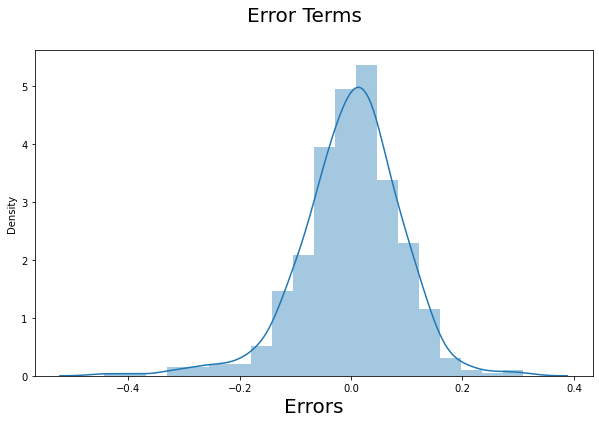

In [98]:
# Plotting the distribution curve for Error terms

fig = plt.figure(figsize=(10, 6))
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 20)
plt.show()

As we can see the error terms are normally distributed with the mean equal to 0

### 8.  Making Predictions

#### 8.1  Scaling the test sets

In [99]:
bike_df_num.columns   # Having a look at all columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [100]:
num = bike_df_num.columns[1:]     # Storing names of all columns barring `temp` in a new variable

In [101]:
num

Index(['atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [102]:
df_test.describe()        # Looking at the numerical summary before scaling 

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Misty,weathersit_Precipitating
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
df_test[num] = scale.transform(df_test[num])   # Scaling the variables using Scale function

In [104]:
df_test.describe()    # Looking at the numerical summary after scaling 

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Misty,weathersit_Precipitating
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 8.2  Splitting the test dataset into X (independent) and y (dependent) vriables

In [105]:
# Making X and y subsets from test dataset

y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()   # looking at column wise info of X variable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        219 non-null    int64  
 1   holiday                   219 non-null    int64  
 2   workingday                219 non-null    int64  
 3   atemp                     219 non-null    float64
 4   hum                       219 non-null    float64
 5   windspeed                 219 non-null    float64
 6   season_Spring             219 non-null    uint8  
 7   season_Summer             219 non-null    uint8  
 8   season_Winter             219 non-null    uint8  
 9   mnth_Aug                  219 non-null    uint8  
 10  mnth_Dec                  219 non-null    uint8  
 11  mnth_Feb                  219 non-null    uint8  
 12  mnth_Jan                  219 non-null    uint8  
 13  mnth_Jul                  219 non-null    uint8  
 14  mnth_Jun 

In [106]:
y_test.head()  # looking at top 5 columns  of y variable

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

#### 8.3  Predction using the final model

In [107]:
X_test_lm7 = X_test[X_2.columns]   # Keeping the columns from final model only (the one used for VIF)

In [108]:
X_test_lm7 = sm.add_constant(X_test_lm7)  # Adding the constant, since we removed the same while calculating VIF  

In [109]:
X_test_lm7.info()  # Checking info for the X test columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     219 non-null    float64
 1   yr                        219 non-null    int64  
 2   holiday                   219 non-null    int64  
 3   atemp                     219 non-null    float64
 4   windspeed                 219 non-null    float64
 5   season_Summer             219 non-null    uint8  
 6   season_Winter             219 non-null    uint8  
 7   mnth_Aug                  219 non-null    uint8  
 8   mnth_Dec                  219 non-null    uint8  
 9   mnth_Feb                  219 non-null    uint8  
 10  mnth_Jan                  219 non-null    uint8  
 11  mnth_Nov                  219 non-null    uint8  
 12  mnth_Sep                  219 non-null    uint8  
 13  weathersit_Misty          219 non-null    uint8  
 14  weathersi

In [110]:
y_pred = lm7.predict(X_test_lm7)   # Predicting y using X test variables with the final model

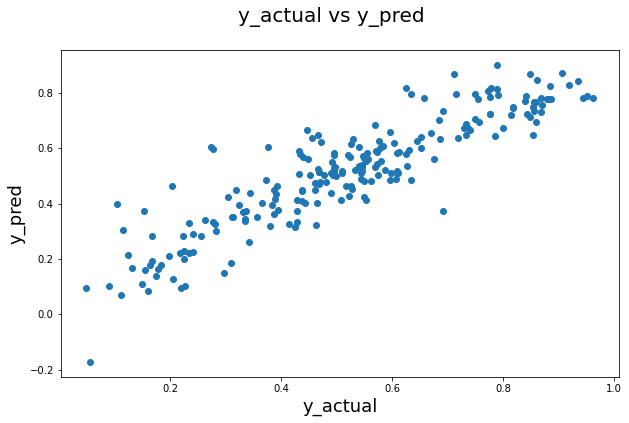

In [111]:
# Plotting actual vs predicted values of bike demand for the sake of check for homoscedasticity

fig = plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
fig.suptitle('y_actual vs y_pred', fontsize = 20)              
plt.xlabel('y_actual', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 18) 
plt.show()

The model meets the assummption for homoscedasticity (equal variance) of residuals

#### 8.4  R square for Predicted set

In [112]:
r2 = r2_score(y_test, y_pred) # Checking R square for test model

In [113]:
r2 

0.8061448794677017

This is a pretty good R2 sqaure, i.e our test model can explain about `80.6` percent of variance in data 

#### 8.5  Adjusted R square for Predicted set

In [114]:
# Checking for adjusted R square for our test model

n = X_test.shape[0]                    # Number of rows is equal to total number of sample size

p = X_test.shape[1]                    # Number of columns is equal to total number of features

adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Formula for adjusted R square

adj_r2

0.7775767564418894

This is a pretty good adjusted R2 sqaure, since the difference between R2 and adj R2 is merely `2.86%` which is below 3 % specified limit

### 9.  Conclusion

    Train R-square          :  83.6%
    Train Adjusted R-square :  83.1%
    Test R-square           :  80.6%
    Test Adjusted R-square  :  77.8%

### 10.  Equation of best fit

The coefficients of our independant variables according to our final model are as follows -:

    const                      ---->      0.2114

    yr                         ---->      0.2349

    holiday                    ---->     -0.0851

    atemp                      ---->      0.4432

    windspeed                  ---->     -0.1493

    season_Summer              ---->      0.0723

    season_Winter              ---->      0.1244

    mnth_Aug                   ---->      0.0580

    mnth_Dec                   ---->     -0.0585

    mnth_Feb                   ---->     -0.0565

    mnth_Jan                   ---->     -0.0875

    mnth_Nov                   ---->     -0.0442

    mnth_Sep                   ---->      0.1044

    weathersit_Misty           ---->     -0.0828

    weathersit_Precipitating   ---->     -0.2875

Which gives the following equation as equation of best fit as follows -:

   $ cnt = 0.2114 + (atemp \times  0.4432) - (weathersitPrecipitating \times  0.2875) + (yr \times  0.2349) - (windspeed \times  0.1493) + (seasonWinter \times  0.1244) + (mnthSep \times  0.1044) - (mnthJan \times  0.0875) - (holiday \times  0.0851) - (weathersitMisty \times  0.0828) + (seasonSummer \times  0.0723) - (mnthDec \times  0.0585) + (mnthAug \times  0.0580) − (mnthFeb \times  0.0565)  - (mnthNov \times  0.0442)   $

### 11.  Infrence

So looking over the above equation it can be said that -:
     
`𝑎𝑡𝑒𝑚𝑝` or the temperature that is felt, contributes highest in the demand of bikes, with a unit increase in atemp, it can be noticed that demand increases by 0.4432 units, given rest are kept constant
    
`𝑤𝑒𝑎𝑡ℎ𝑒𝑟𝑠𝑖𝑡𝑃𝑟𝑒𝑐𝑖𝑝𝑖𝑡𝑎𝑡𝑖𝑛𝑔` or when its either raining/snowing/thunderstorms outside the demands gets reduced, it can be noticed that demand decreases by 0.2875 units for a unit increase in the former, given rest are kept constant
     
`𝑦𝑟` contributes significant in the demand of bikes, with a unit increase in year, it can be noticed that demand increases by 0.2349 units with a unit increase in year, given rest are kept constant i.e the demand is increasing on yearly basis